**Person Detection with Yolov8 - Assignment**

Name: Suprasanna V Gunaga

BE Information Science and Engineering

Email: suprasanna.gunaga@gmail.com

[LinkedIn](https://linkedin.com/in/suprasanna-v-gunaga-189831228)
    [GitHub](https://github.com/SuprasannaVG)

In [11]:
!pip install ultralytics

**Making the predictions on Images using pretrained Yolov8s Model**

*Dataset*

100 images with people in diverse conditions.

70-training, 20-Validating, 10-Testing.


0: 448x640 2 persons, 765.2ms
Speed: 4.0ms preprocess, 765.2ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


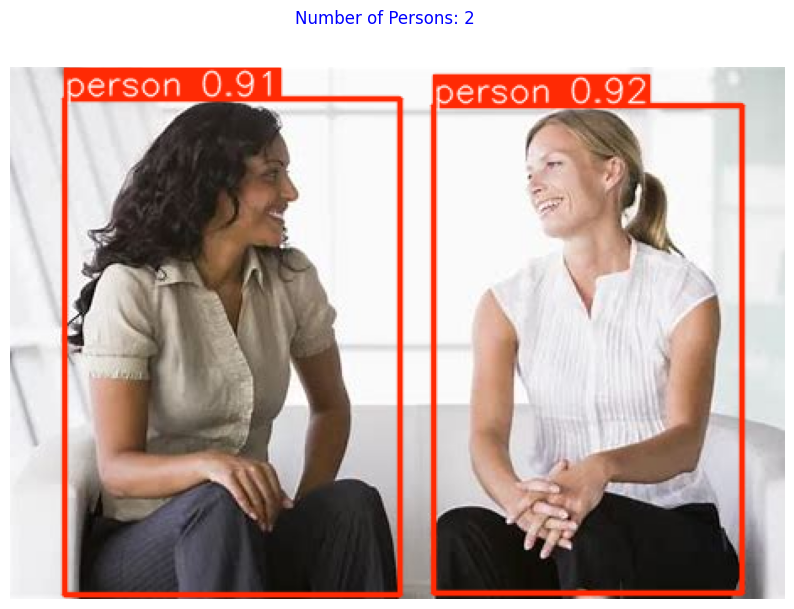


0: 448x640 7 persons, 1 tv, 665.4ms
Speed: 5.0ms preprocess, 665.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


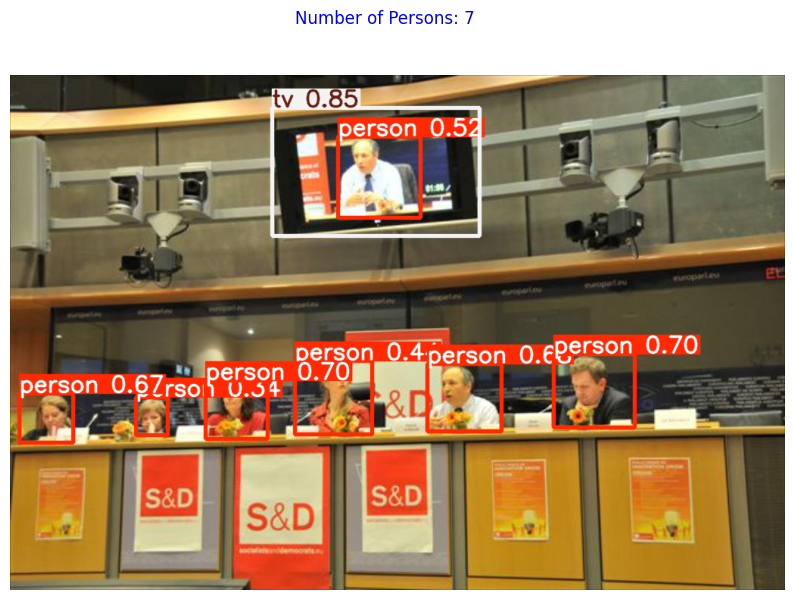


0: 512x640 3 persons, 582.2ms
Speed: 4.6ms preprocess, 582.2ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


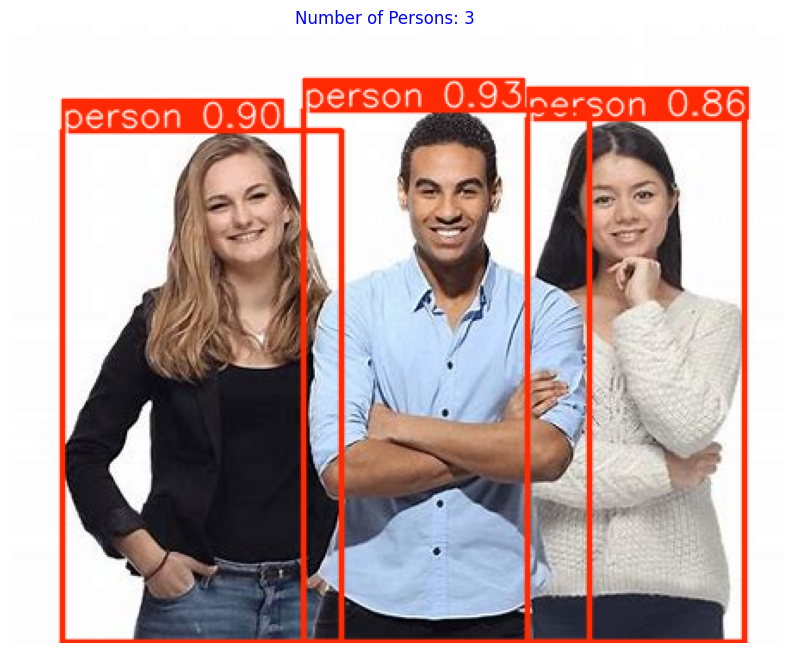

In [36]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


model = YOLO('yolov8s.pt')


image_paths = [
    '/content/drive/MyDrive/Labellmg/Extra/OIP.jpeg',
    '/content/drive/MyDrive/Labellmg/Extra/00056dc4f587f43e.jpg',
    '/content/drive/MyDrive/Labellmg/Extra/OIP (3).jpeg'
]


for image_path in image_paths:

    img = cv2.imread(image_path)


    if img is None:
        print(f"Error: Could not load image at {image_path}")
    else:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


        results = model.predict(img_rgb)


        person_class_id =
        num_persons = sum(1 for cls in results[0].boxes.cls if cls == person_class_id)


        annotated_img = results[0].plot()


        plt.figure(figsize=(10, 10))
        plt.imshow(annotated_img)
        plt.axis('off')


        plt.figtext(0.5, 0.8, f'Number of Persons: {num_persons}', ha='center', va='bottom', fontsize=12, color='blue')
        plt.show()


**Computing the Evaluation Matrics**


*   Precision
*   Recall
*   F1 Score
*   mAP@50





In [14]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from pathlib import Path

# Loading the pretrained YOLOv8 model
model = YOLO('yolov8s.pt')


custom_data_yaml = '/content/drive/MyDrive/Labellmg/data.yaml'

# Validating the model on the custom dataset
try:
    results = model.val(data=custom_data_yaml)
except Exception as e:
    print(f"Error during validation: {e}")
    results = None


if results:

    precision = results.results_dict.get('metrics/precision(B)', 0)
    recall = results.results_dict.get('metrics/recall(B)', 0)
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0  # Avoid division by zero
    map50 = results.results_dict.get('metrics/mAP50(B)', 0)
    map50_95 = results.results_dict.get('metrics/mAP50-95(B)', 0)

    # Displaying metrics
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")
    print(f"mAP@50: {map50:.4f}")
    print(f"mAP@50-95: {map50_95:.4f}")




Ultralytics 8.3.62 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s summary (fused): 168 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs


val: Scanning /content/drive/MyDrive/Labellmg/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.76s/it]


                   all         20        109      0.764      0.679      0.713      0.307
                person         20        109      0.764      0.679      0.713      0.307
Speed: 5.0ms preprocess, 950.7ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/val6
Precision: 0.7645
Recall: 0.6789
F1 Score: 0.7191
mAP@50: 0.7133
mAP@50-95: 0.3069


**Observation on computed metrics**
*  **Precision**: The model achieved a precision of 0.7645, indicating that approximately 76% of the predicted detections were correct.
*  **Recall**: The recall value of 0.6789 suggests that the model detected about 67% of the true objects present in the images.
*  **F1 Score**: The F1 score of 0.7191 shows a good balance between precision and recall.
*  **mAP@50**: A mAP@50 of 0.7133 indicates the model is performing reasonably well at a moderate level of IoU (0.5).
*  **mAP@50-95**: The mAP@50-95 of 0.3069 shows that the model struggles with tighter object overlaps and may need further improvement, particularly for detecting smaller or heavily occluded objects.


